### Visualizing intermediate activations

<p>Imagine you want to see what your neural network is "thinking" as it processes an image. <b>Visualizing intermediate activations</b> is like peeking inside its brain.</p>
<p>When an image goes through your network, each <b>convolutional</b> and <b>pooling layer</b> produces an "output" – these outputs are called <b>activations</b> or <b>feature maps</b>. These feature maps have three dimensions: width, height, and depth (which are different "channels").</p>
<p>Each of these channels represents a different "feature" that the network has learned to detect (like edges, textures, or specific patterns). To understand what's happening, we display each of these channels as a separate 2D image. This helps us see how the network breaks down the input image into these various learned features.</p>
<p>So, we're essentially taking the brain's "thoughts" at different stages and making them visible so we can understand them.</p>

In [1]:
import keras
import numpy as np

model = keras.models.load_model("../CNN/convnet_from_scratch_with_augmentation.keras")
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,982,084 (7.56 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 991,043 (3.78 MB)

In [29]:
img_path = keras.utils.get_file( 
    fname="cat.jpg",   
    origin="https://img-datasets.s3.amazonaws.com/cat.jpg"
)
img = keras.utils.load_img(img_path, target_size=(180, 180))
img_tensor = keras.utils.img_to_array(img)
# # expand dimensions so that it represents a single 'sample'. # Add batch dimension
img_tensor = np.expand_dims(img_tensor, axis=0) #img_tensor.reshape((1,) + img_tensor.shape) # similar to np.expand_dims(array, axis=0)
img_tensor.shape

(1, 180, 180, 3)

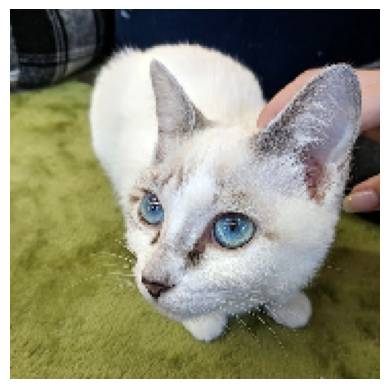

In [30]:
import matplotlib.pyplot as plt
plt.axis("off")
plt.imshow(img_tensor[0].astype("uint8"))
plt.show()

##### To examine the internal workings of our neural network, we'll build a special Keras model. This model takes an input image and, instead of giving a single final prediction, it outputs the activations (or feature maps) from all the convolutional and pooling layers within the original model.

##### Essentially, it's a multi-output model – it has one input but provides nine different outputs, one for each layer's activation. This setup lets us see exactly what information each part of the network is extracting from the image.

In [31]:
from keras import layers

layer_names = []
layer_outputs = []

for layer in model.layers:
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)

activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)
    

In [43]:
activations = activation_model.predict(img_tensor)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [53]:
print(len(activations))
activation1 = activations[0]
print(activation1.shape) # It’s a 178  178 feature map with 32 channels.

9
(1, 178, 178, 32)


### showing 5th channels of the 1st activation

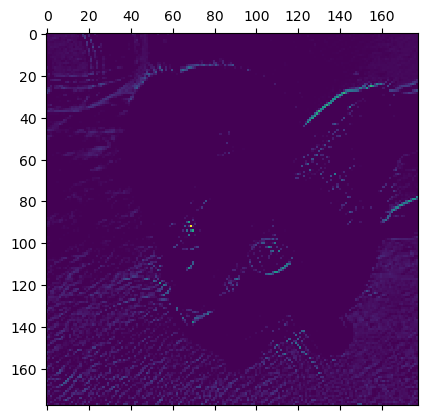

In [64]:
plt.matshow(activation1[0, :, :, 5], cmap="viridis")

### showing all 32 channels of the 1st activation

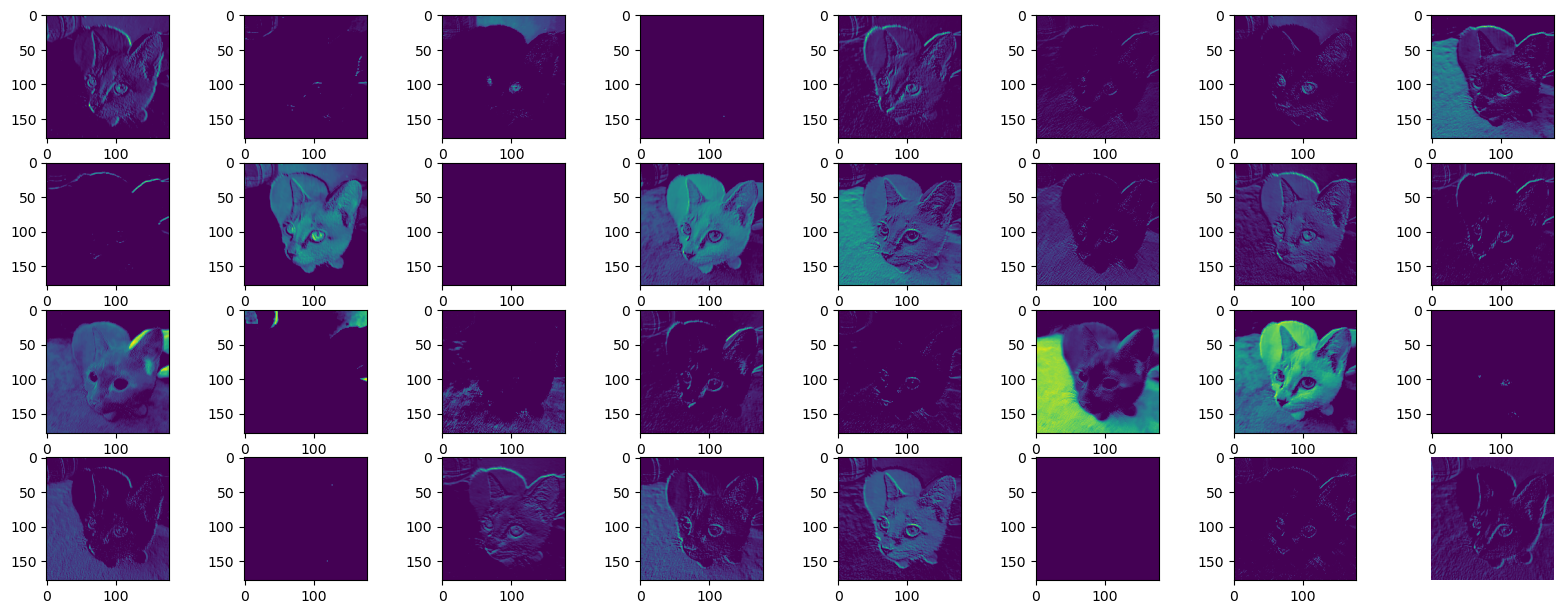

In [48]:
plt.figure(figsize=(20, 15))
for i in range(1, activation1.shape[3]+1):
    plt.subplot(8,8,i)
    plt.imshow(activation1[0, :, :, i-1], cmap="viridis")
plt.axis("off")
plt.show()
    

### Visualizing all channels in all intermediate activation

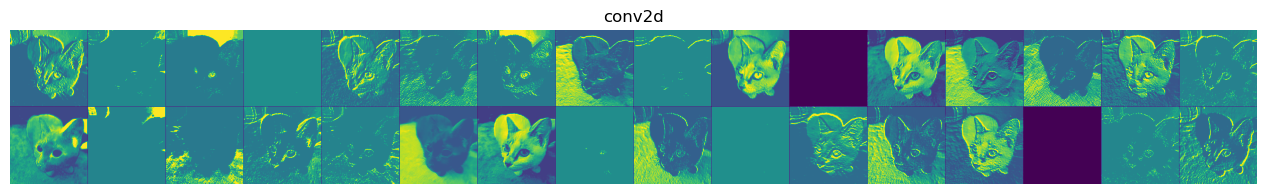

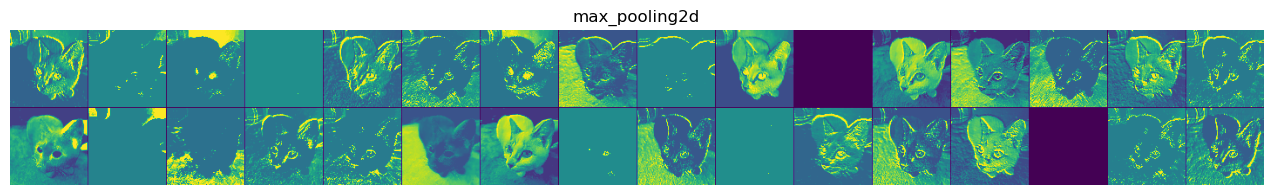

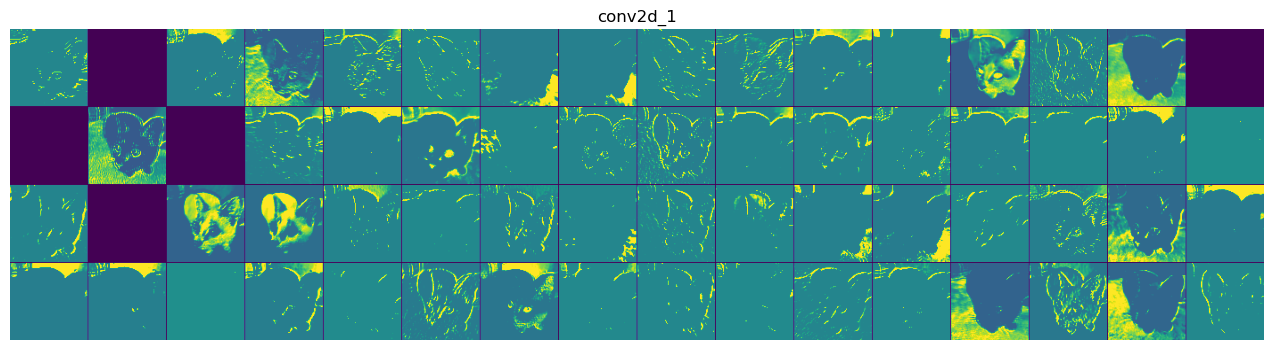

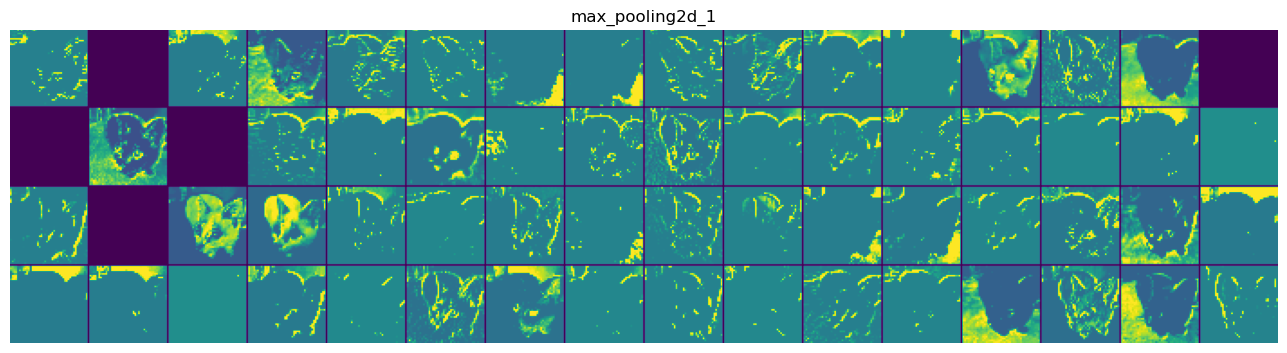

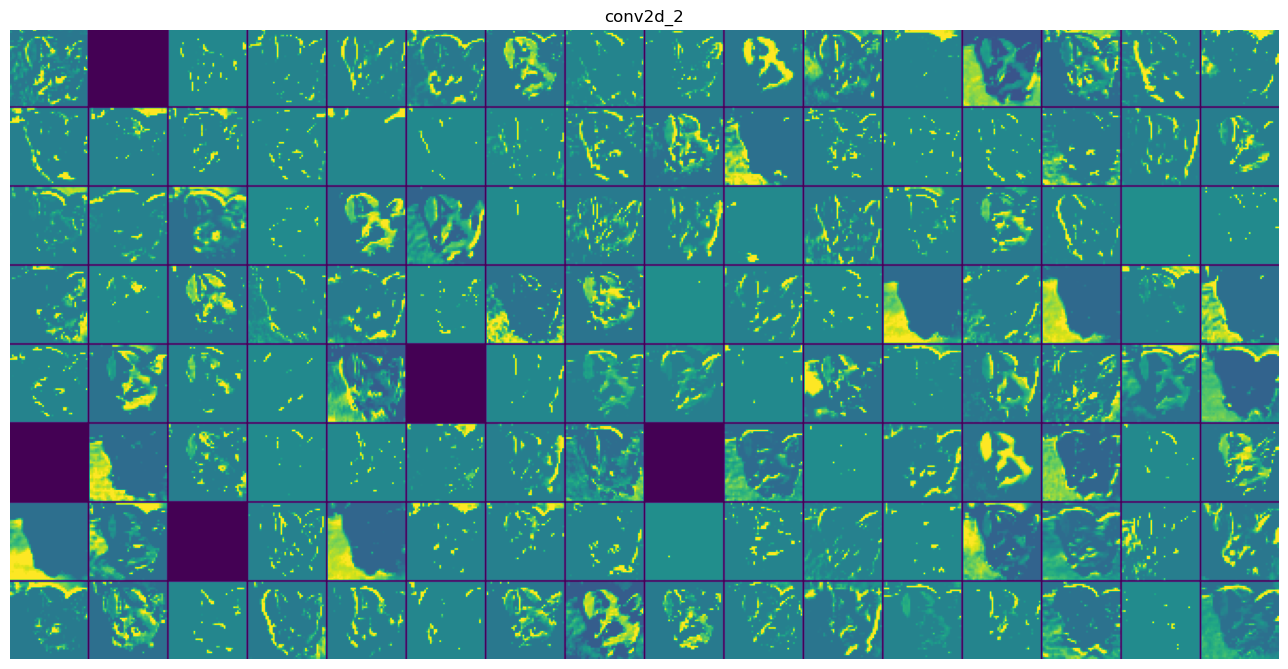

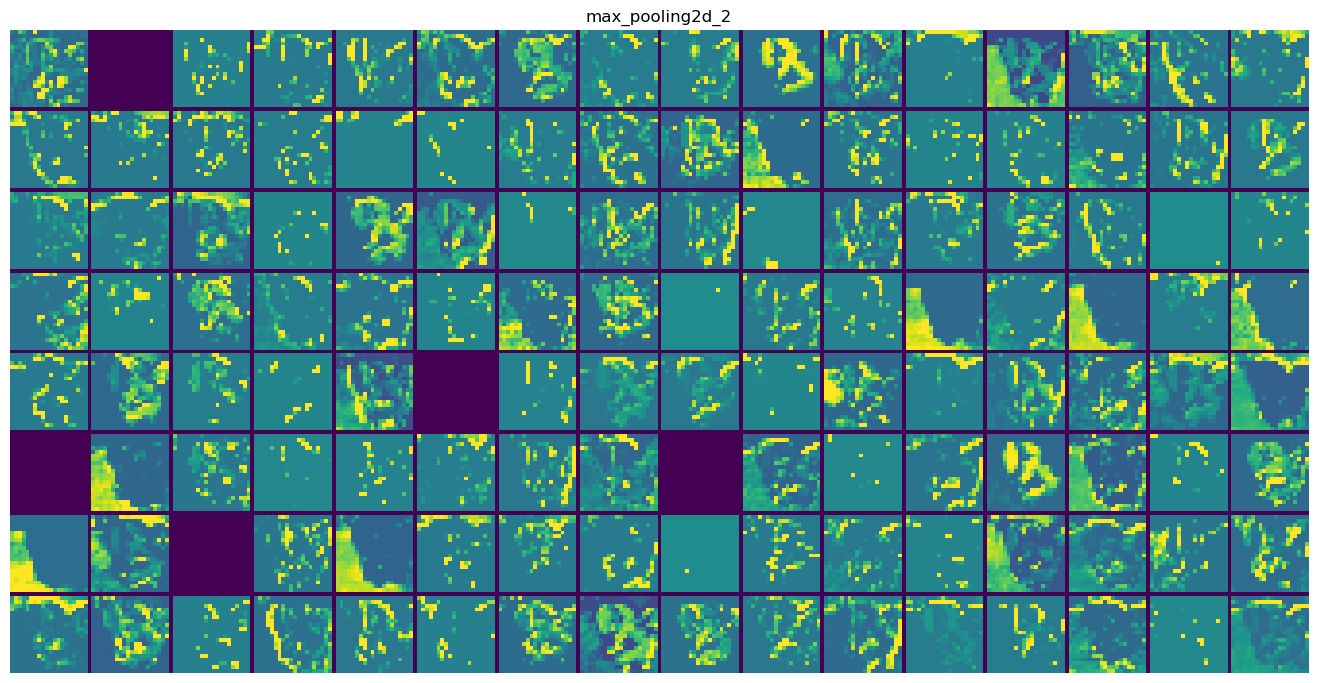

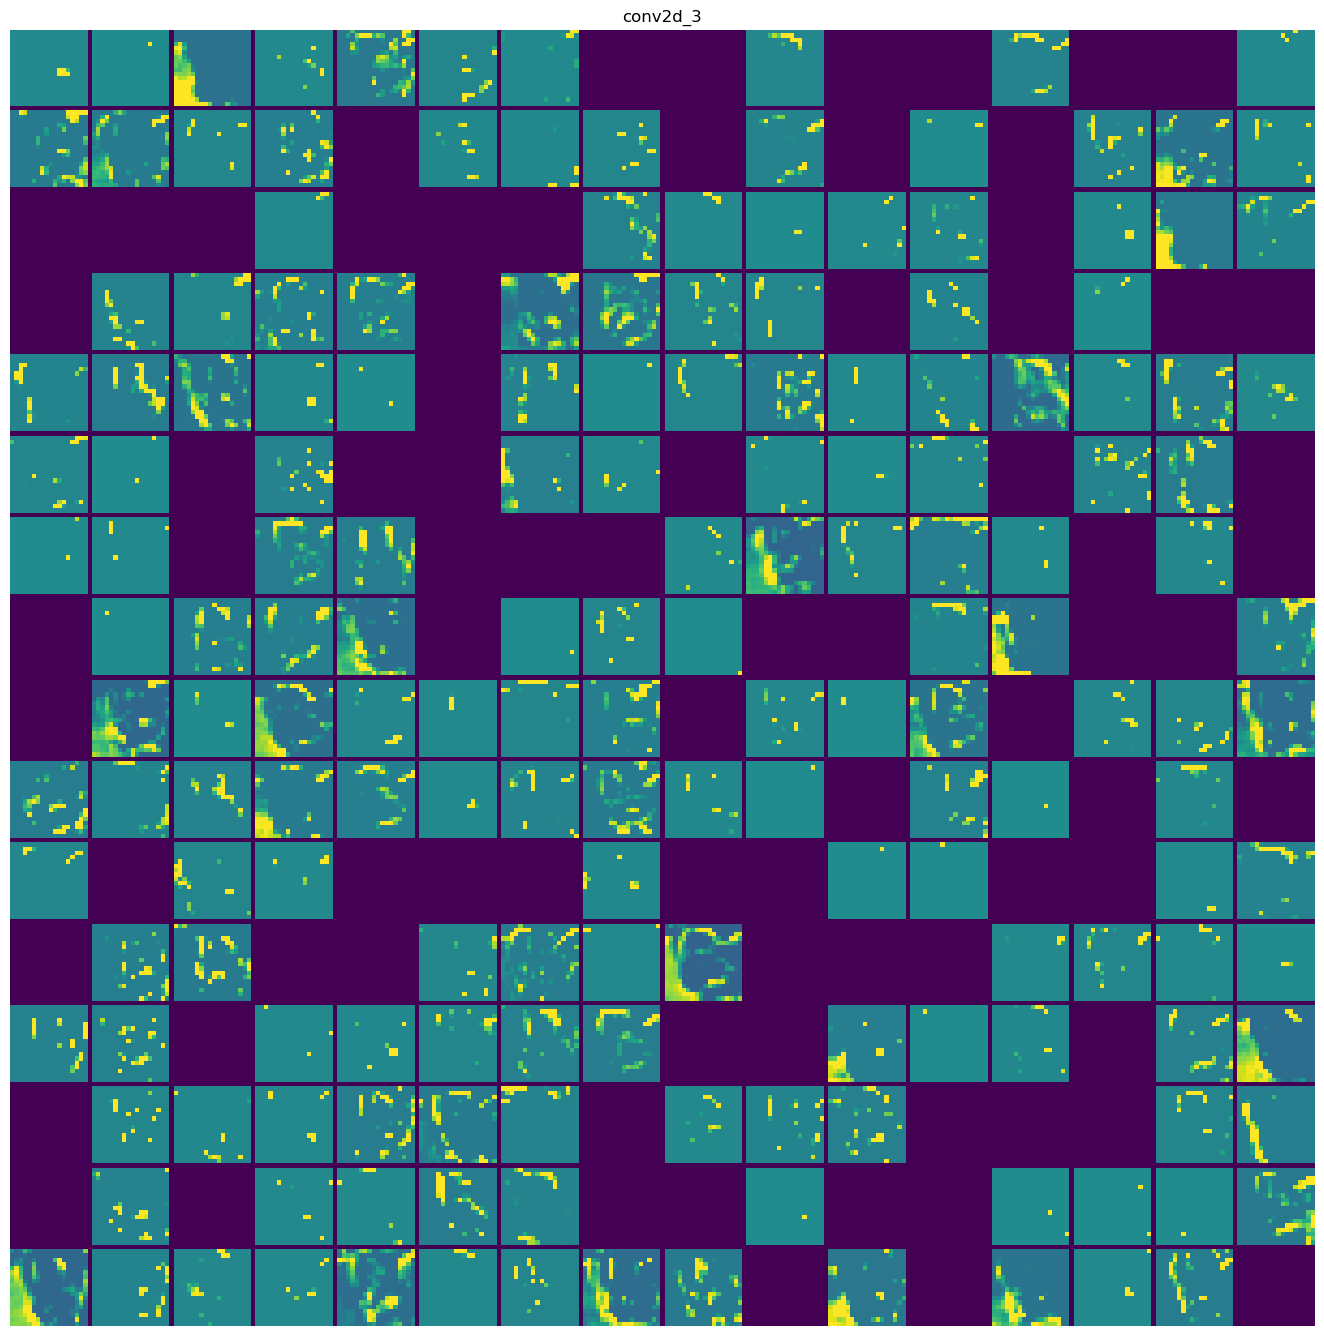

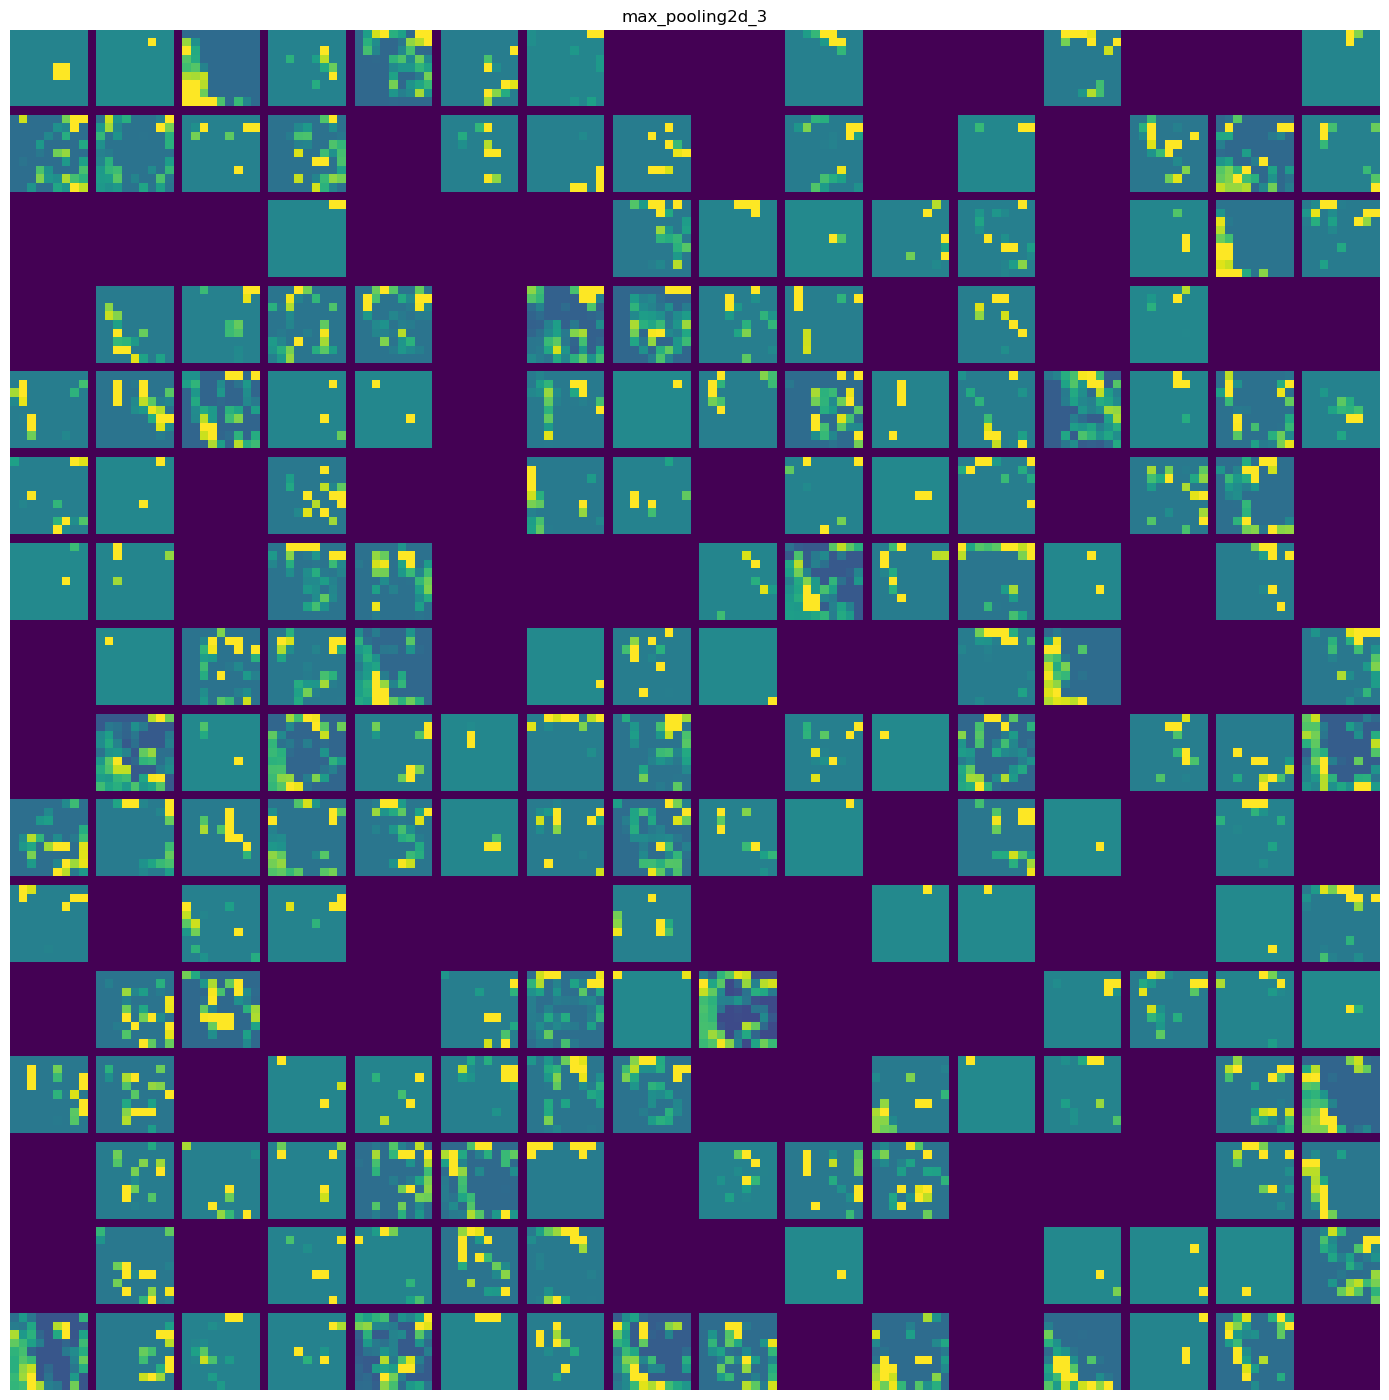

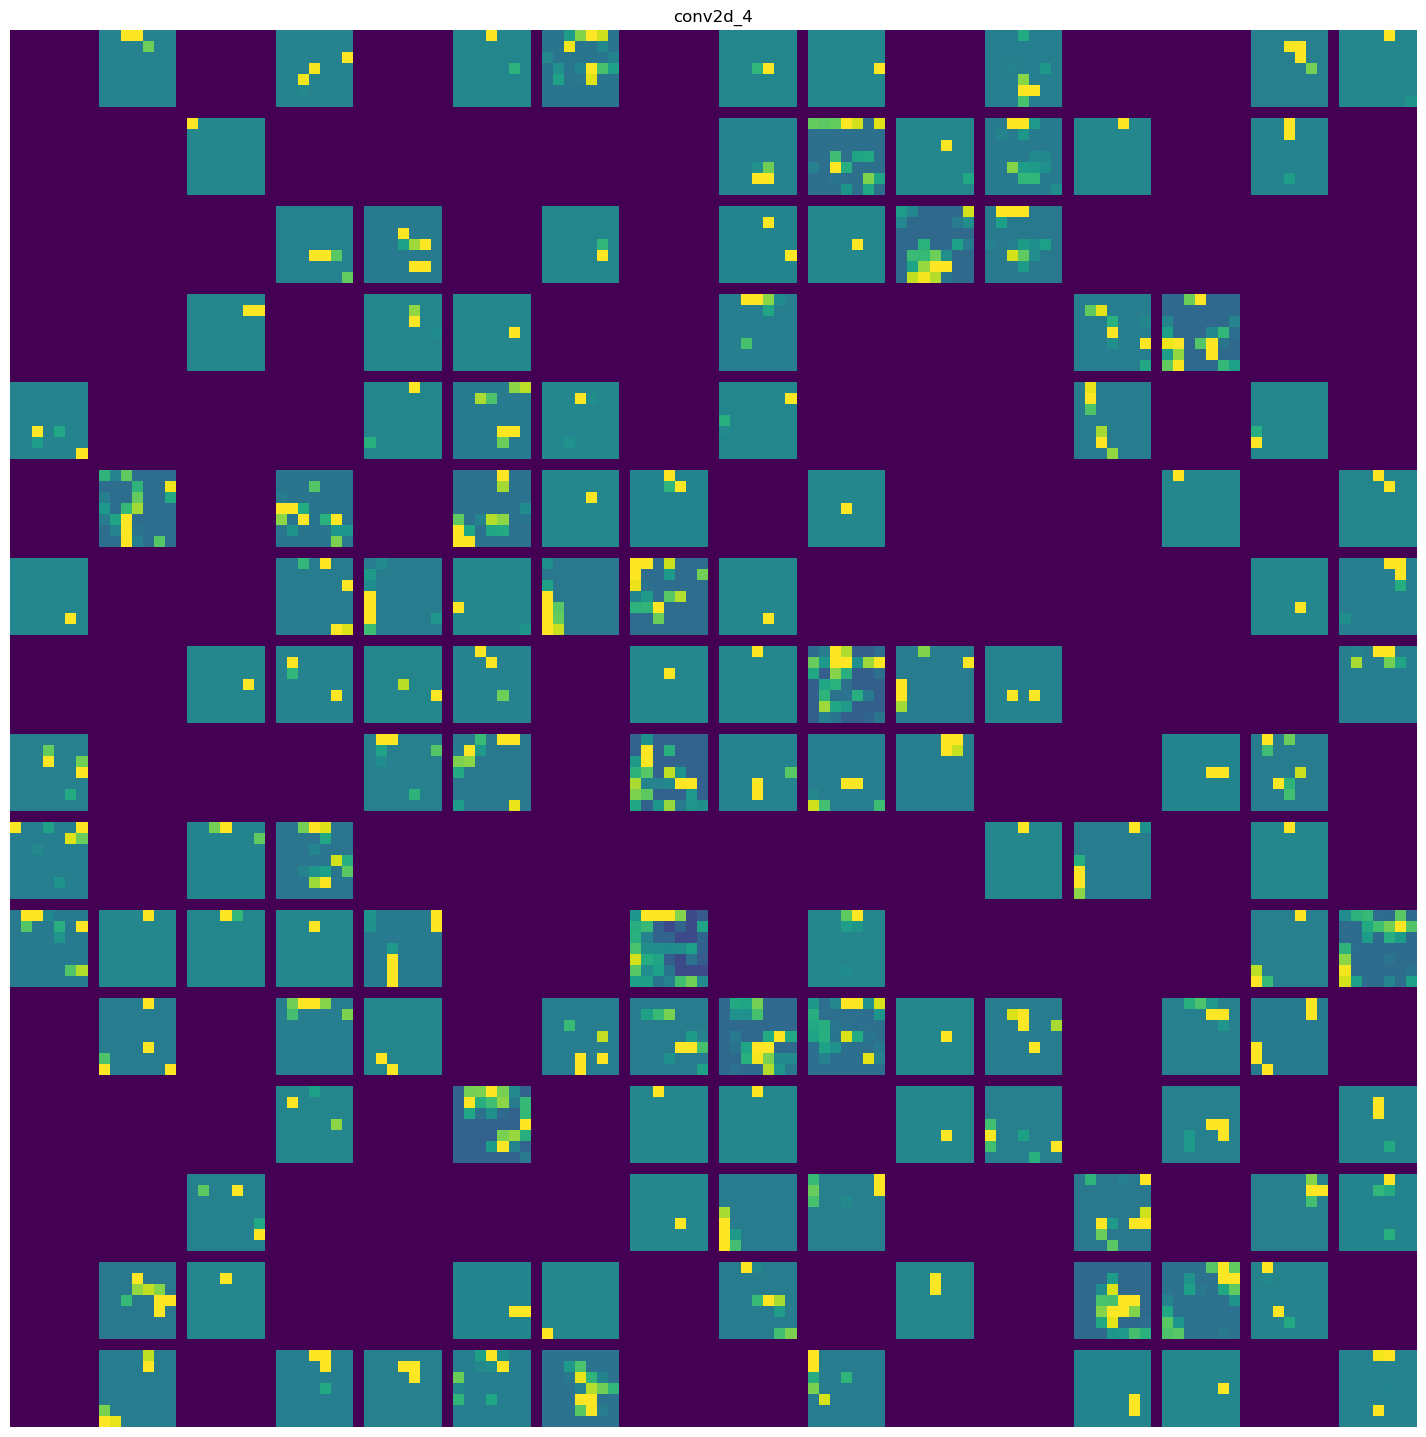

In [54]:
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros(((size + 1) * n_cols - 1,
                             images_per_row * (size + 1) - 1))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_index = col * images_per_row + row
            channel_image = layer_activation[0, :, :, channel_index].copy()
            if channel_image.sum() != 0:
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype("uint8")
            display_grid[
                col * (size + 1): (col + 1) * size + col,
                row * (size + 1) : (row + 1) * size + row] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.axis("off")
    plt.imshow(display_grid, aspect="auto", cmap="viridis")

<p>Imagine looking at what a neural network "sees" as it processes a picture, layer by layer:</p>

<ul>
    <li>
        <strong>Early Layers (like the first one):</strong> These are like simple <strong>edge detectors</strong>. They pick up basic shapes and lines, and at this stage, the network pretty much holds onto all the original details of the picture.
    </li>
    <li>
        <strong>Deeper Layers:</strong> As you go further into the network, what it "sees" becomes more and more abstract. Instead of simple edges, the activations might start lighting up for things like a "cat's ear" or a "cat's eye." At this point, the network cares less about the exact visual details and more about <strong>what the image is</strong> (e.g., "this is a cat").
    </li>
    <li>
        <strong>Sparsity:</strong> You'll also notice that the deeper you go, the "blanker" some of the filters become. In the first layer, almost every filter reacts to the image. But deeper down, many filters won't react at all, meaning the specific pattern they're looking for isn't present in that particular image.
    </li>
</ul>